In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Load Data

In [2]:
dataSize = ["256", "512", "1K", "2K", "4K", "8K", "16K", "32K", 
            "64K", "128K","256K", "512K", "1M", "2M", "4M",]

In [3]:
# real-time priority without extra CPU load

realTime = np.zeros([300, len(dataSize)])
for i in range(len(dataSize)):
    realTime[:, i] = np.loadtxt("./q3/RT/"+"transport_time_"+str(dataSize[i])+"byte.txt", dtype=np.float64) * 1000 # convert "s" to "ms"
    

In [4]:
# real-time priority with extra CPU load

realTimeLoad = np.zeros([300, len(dataSize)])
for i in range(len(dataSize)):
    realTimeLoad[:, i] = np.loadtxt("./q3/RTloaded/"+"transport_time_"+str(dataSize[i])+"byte.txt", dtype=np.float64) * 1000 # convert "s" to "ms"
    

In [5]:
# non-real-time priority without extra CPU load

nonRealTime = np.zeros([300, len(dataSize)])
for i in range(len(dataSize)):
    nonRealTime[:, i] = np.loadtxt("./q3/non-RT/"+"transport_time_"+str(dataSize[i])+"byte.txt", dtype=np.float64) * 1000 # convert "s" to "ms"
    

In [6]:
# non-real-time priority with extra CPU load

nonRealTimeLoad = np.zeros([300, len(dataSize)])
for i in range(len(dataSize)):
    nonRealTimeLoad[:, i] = np.loadtxt("./q3/non-RTloaded/"+"transport_time_"+str(dataSize[i])+"byte.txt", dtype=np.float64) * 1000 # convert "s" to "ms"
    

# Make pd.Dataframe

In [7]:
RT = pd.DataFrame(data=realTime, columns=dataSize)
RTL = pd.DataFrame(data=realTimeLoad, columns=dataSize)
nonRT = pd.DataFrame(data=nonRealTime, columns=dataSize)
nonRTL = pd.DataFrame(data=nonRealTimeLoad, columns=dataSize)

# Box-Plot

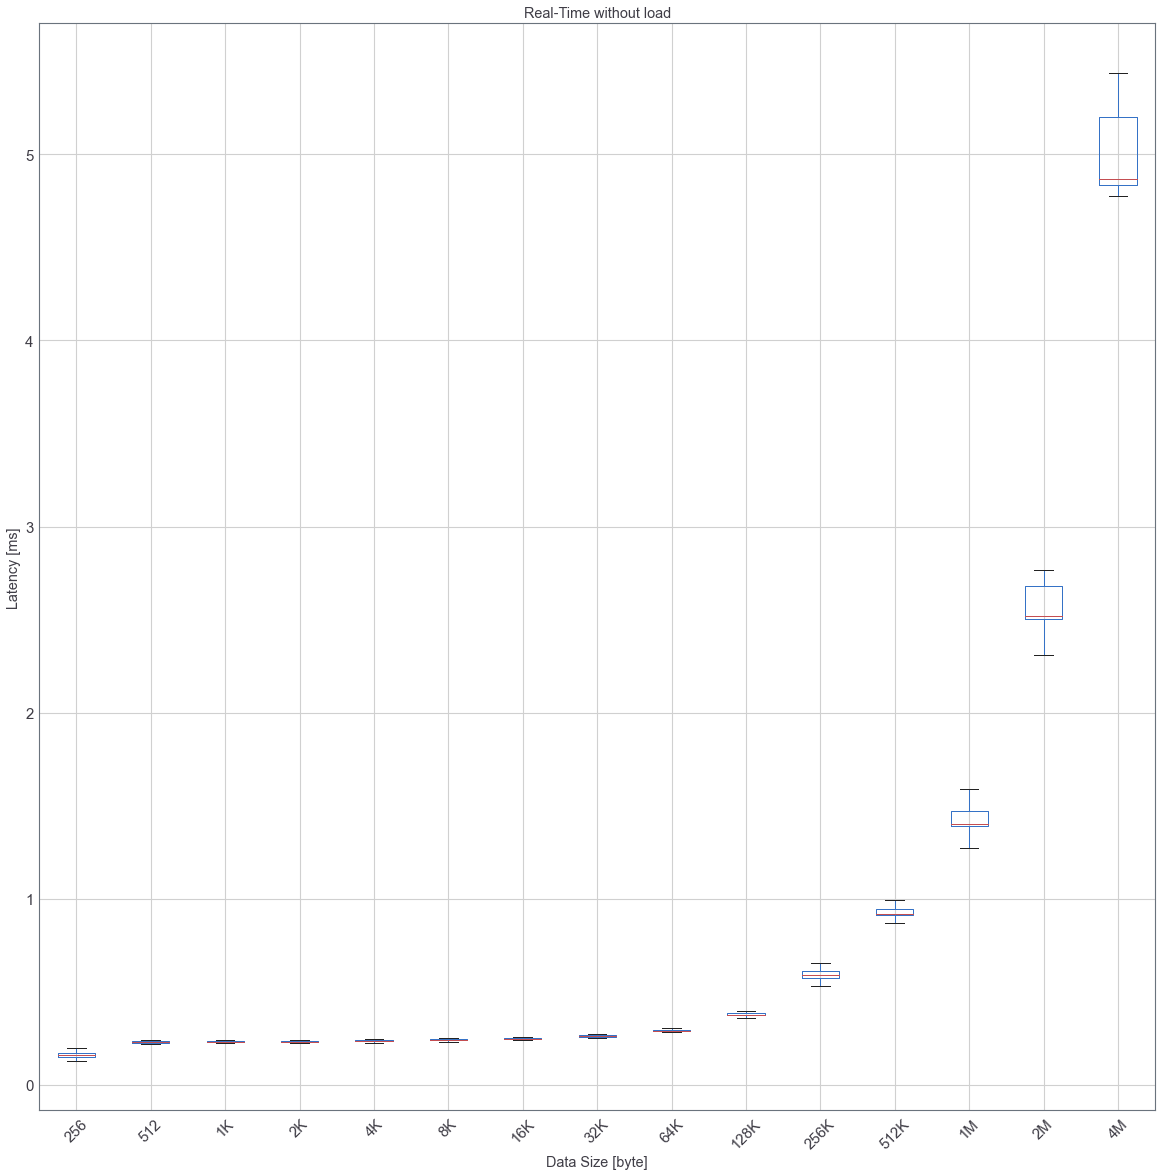

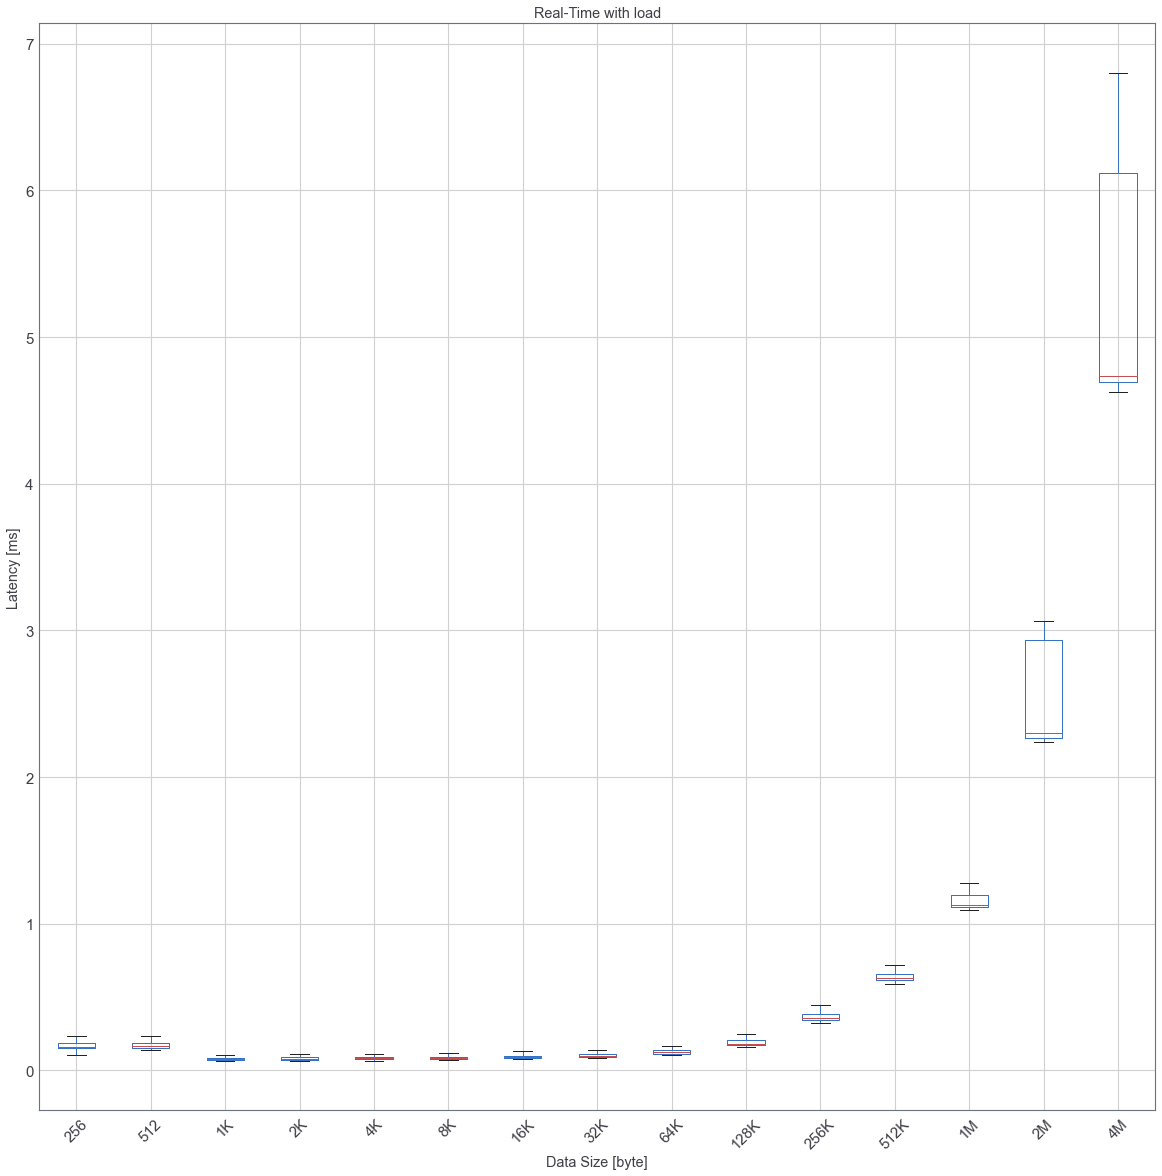

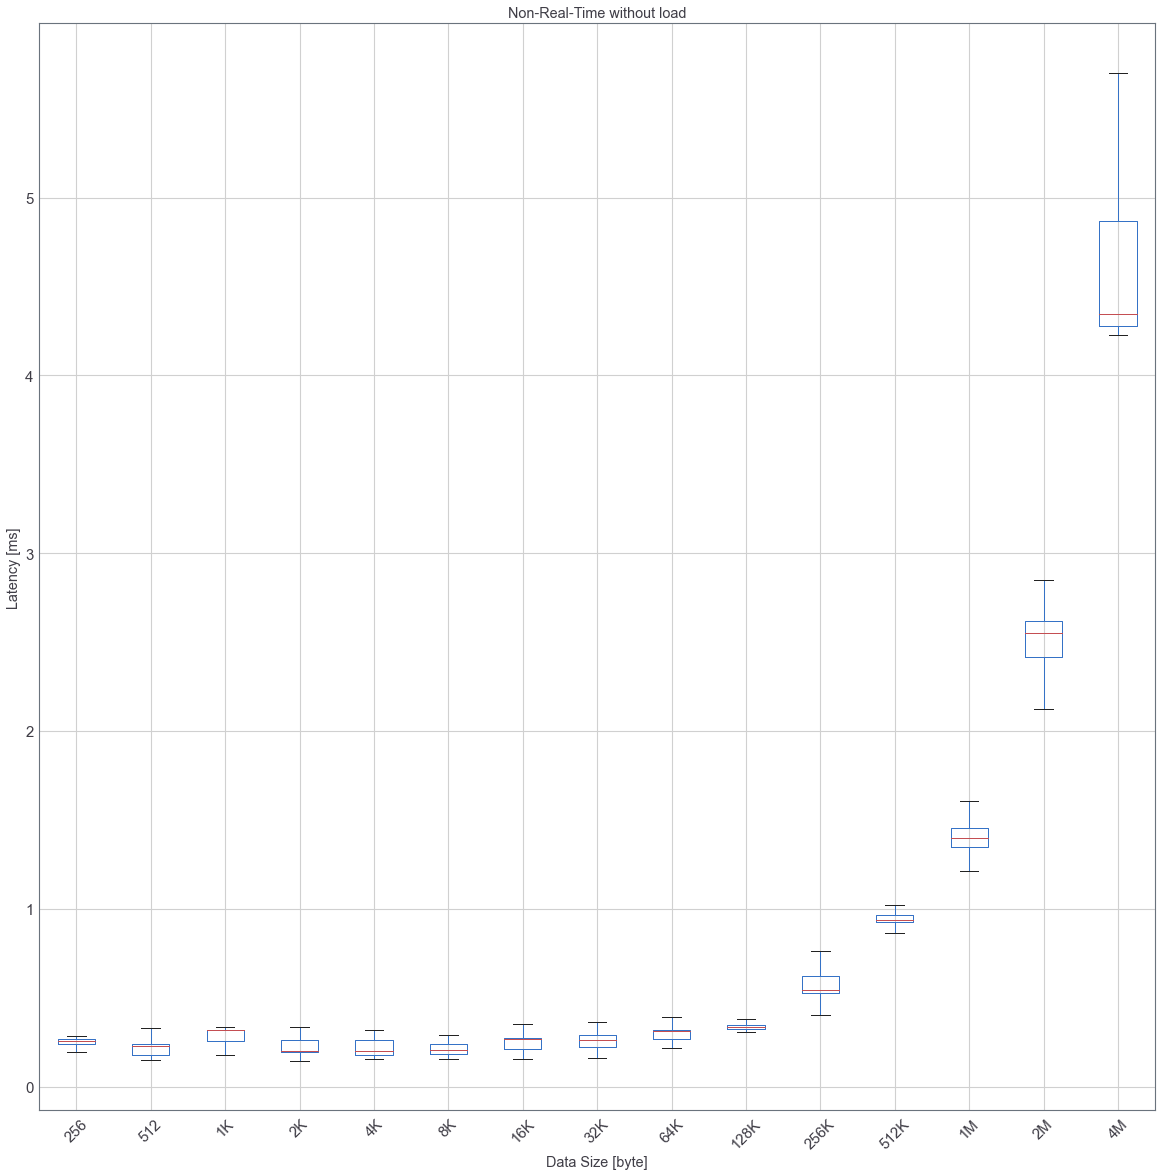

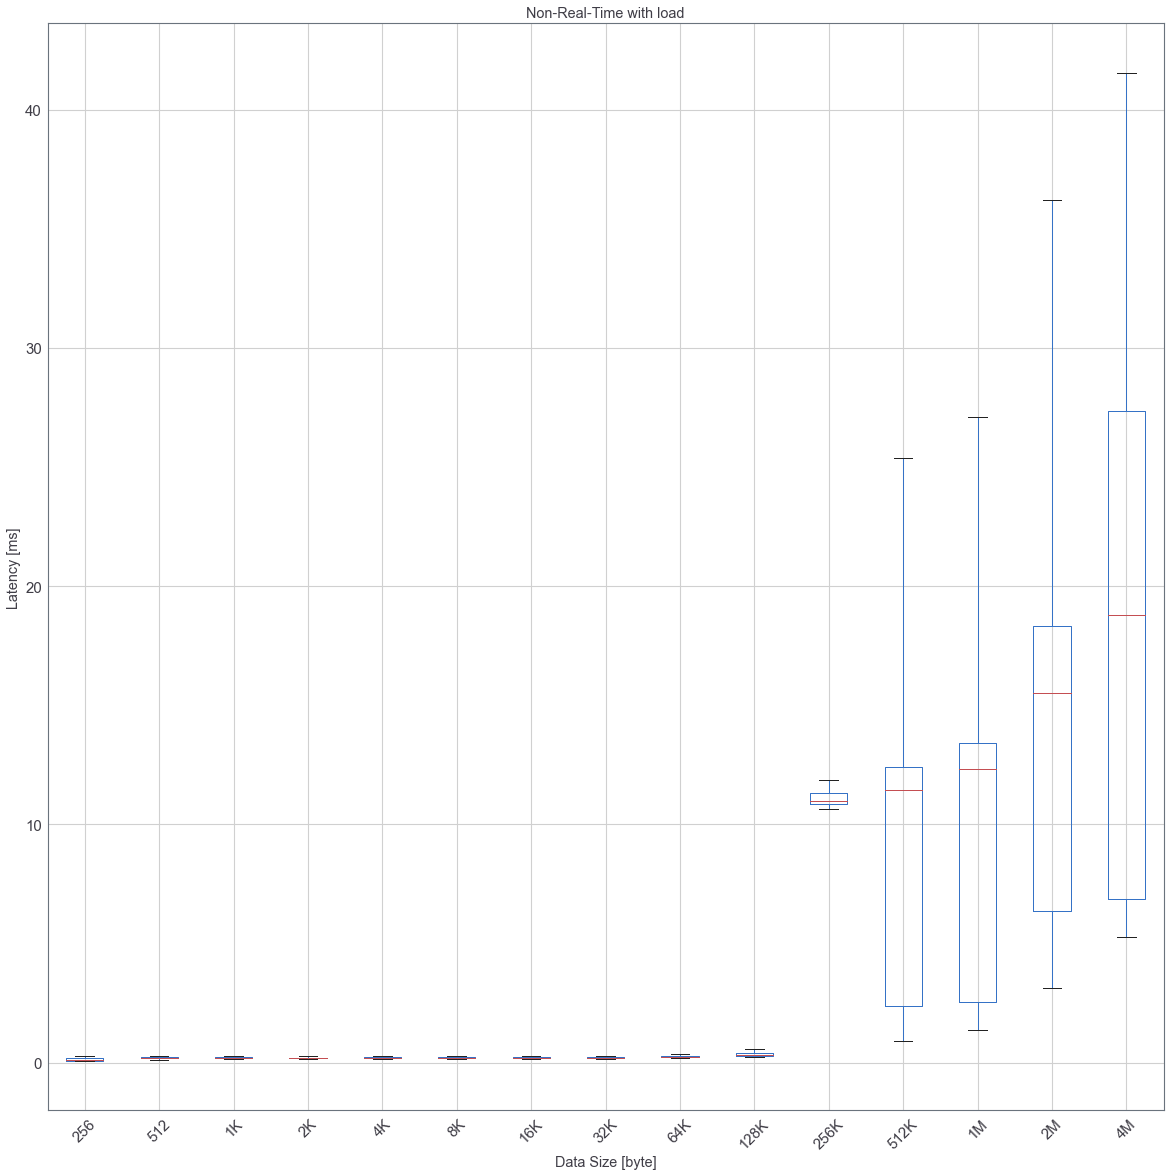

In [8]:
RT_box = plt.figure(num=1, figsize=(20,20))
boxplot = RT.boxplot(rot=45, fontsize=15, showfliers=False)
boxplot.set_ylabel("Latency [ms]")
boxplot.set_xlabel("Data Size [byte]")
boxplot.set_title("Real-Time without load")
RT_box.savefig("./q3/figure/RT_box.png", format="png")

RTL_box = plt.figure(num=2, figsize=(20,20))
boxplot = RTL.boxplot(rot=45, fontsize=15, showfliers=False)
boxplot.set_ylabel("Latency [ms]")
boxplot.set_xlabel("Data Size [byte]")
boxplot.set_title("Real-Time with load")
RTL_box.savefig("./q3/figure/RTL_box.png", format="png")

nonRT_box = plt.figure(num=3, figsize=(20,20))
boxplot = nonRT.boxplot(rot=45, fontsize=15, showfliers=False)
boxplot.set_ylabel("Latency [ms]")
boxplot.set_xlabel("Data Size [byte]")
boxplot.set_title("Non-Real-Time without load")
nonRT_box.savefig("./q3/figure/nonRT_box.png", format="png")

nonRTL_box = plt.figure(num=4, figsize=(20,20))
boxplot = nonRTL.boxplot(rot=45, fontsize=15, showfliers=False)
boxplot.set_ylabel("Latency [ms]")
boxplot.set_xlabel("Data Size [byte]")
boxplot.set_title("Non-Real-Time with load")
nonRTL_box.savefig("./q3/figure/nonRTL_box.png", format="png")

I will choose the last three message sets for quantitative analysis.

In [9]:
label = [
            "real_1M", "real_2M", "real_4M",
            "real_load_1M", "real_load_2M", "real_load_4M",
            "non-real_1M", "non-real_2M", "non-real_4M",
            "non-real_load_1M", "non-real_load_2M", "non-real_load_4M"
        ]

In [10]:
data = np.hstack((realTime[:,-3:], realTimeLoad[:,-3:], nonRealTime[:,-3:], nonRealTimeLoad[:,-3:]))
df = pd.DataFrame(data=data, columns=label)

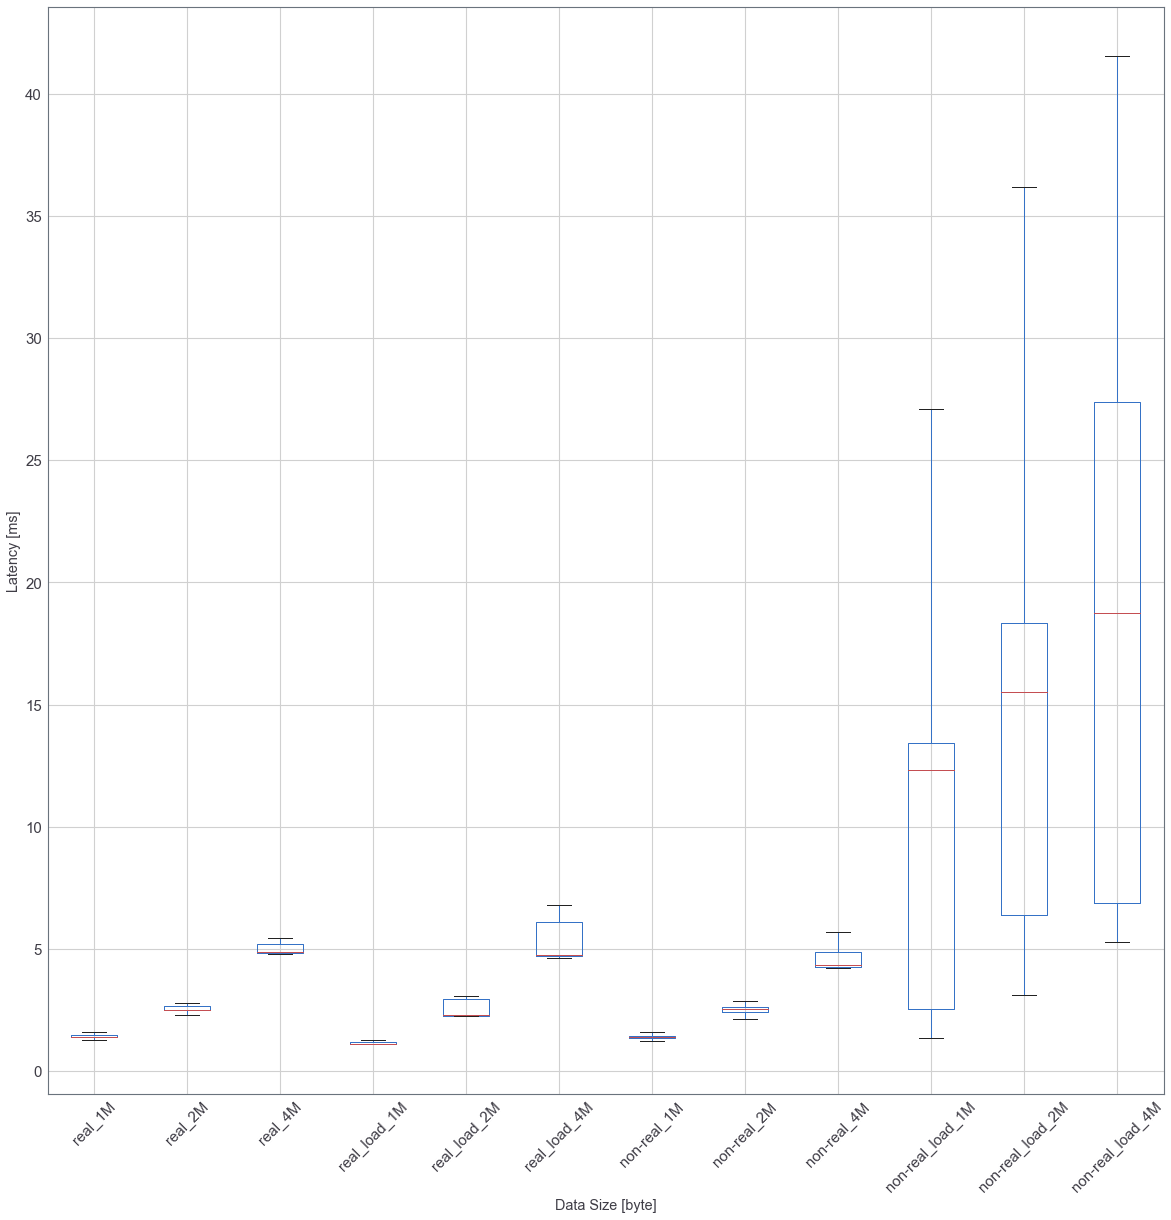

In [11]:
q3box = plt.figure(figsize=(20,20))
boxplot = df.boxplot(rot=45, fontsize=15, showfliers=False)
boxplot.set_ylabel("Latency [ms]")
boxplot.set_xlabel("Data Size [byte]")
q3box.savefig("./q3/figure/q3BoxPlot.png", format="png")

# Histograms Plot

In [12]:
def cap(x,quantile=[0.01,0.99]):
    """
    CAP Algorithm to delete the outliers
    
    Args：
        x：pd.Series
        quantile：upper/lower boundary in precentage
    """

    Q01,Q99=x.quantile(quantile).values.tolist()

    if Q01 > x.min():
        x = x.copy()
        x.loc[x<Q01] = Q01

    if Q99 < x.max():
        x = x.copy()
        x.loc[x>Q99] = Q99

    return(x)

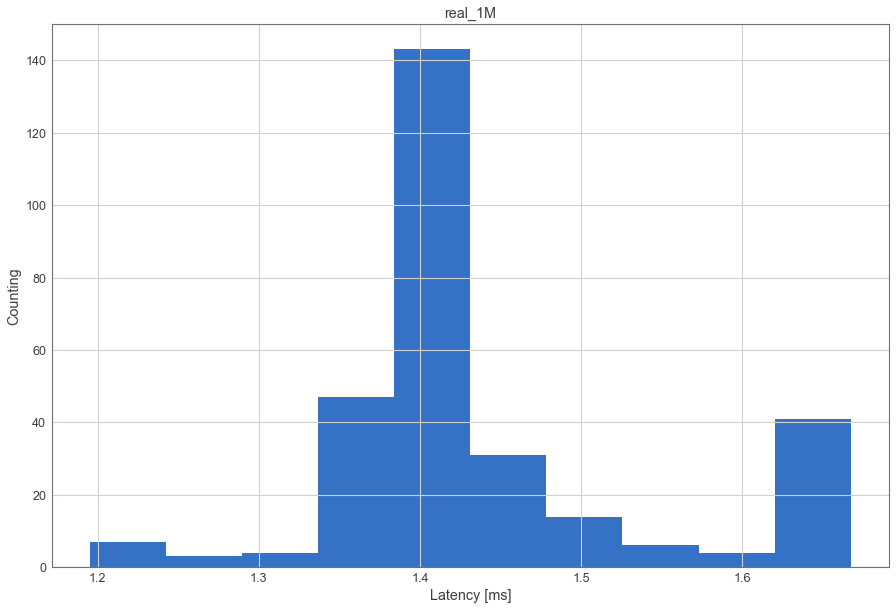

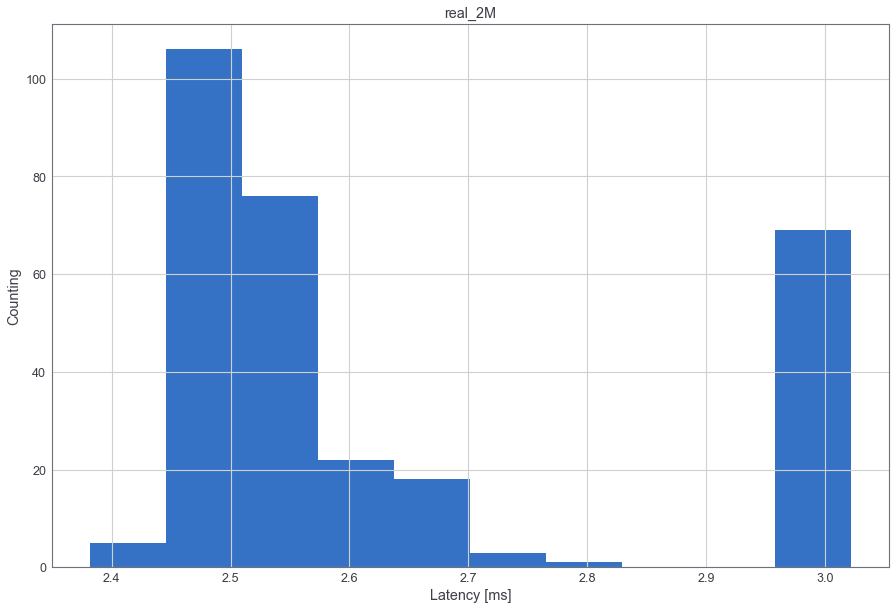

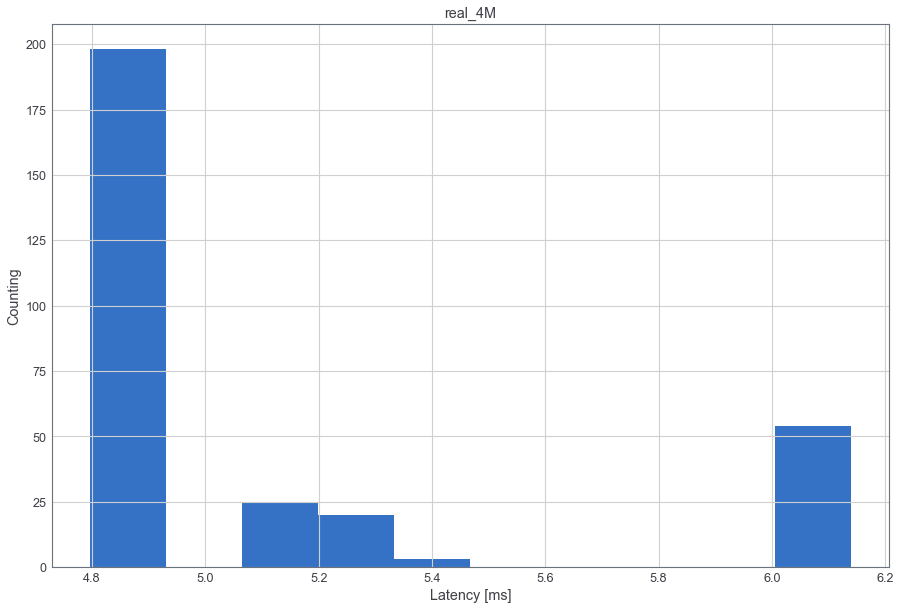

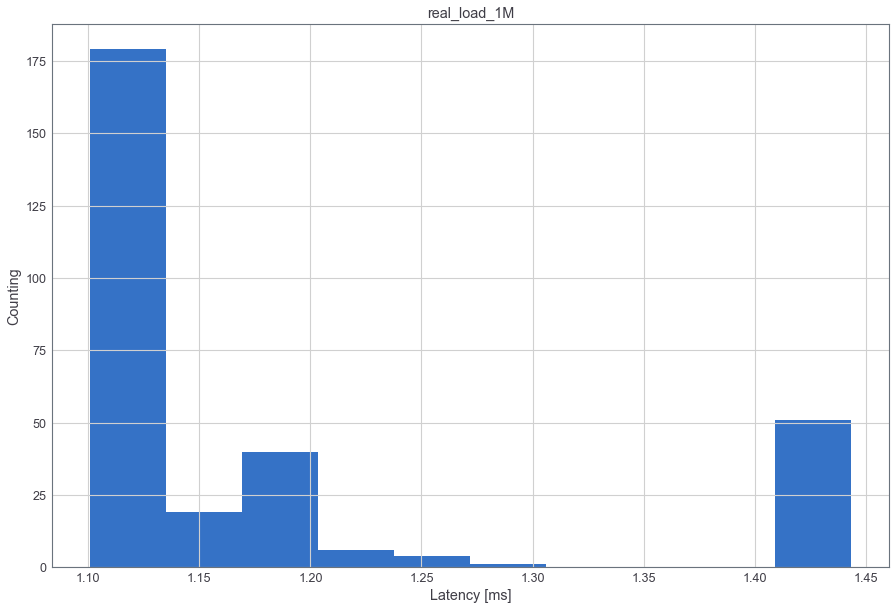

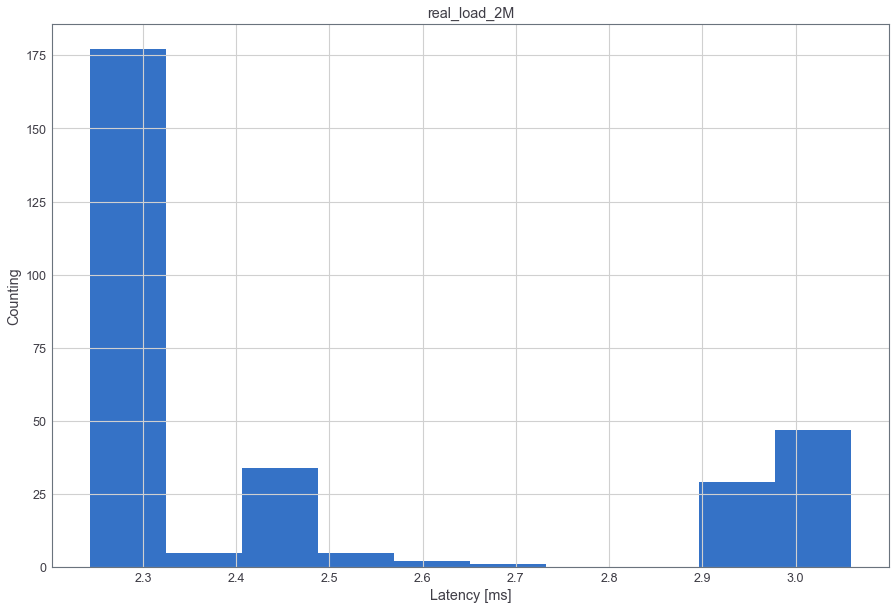

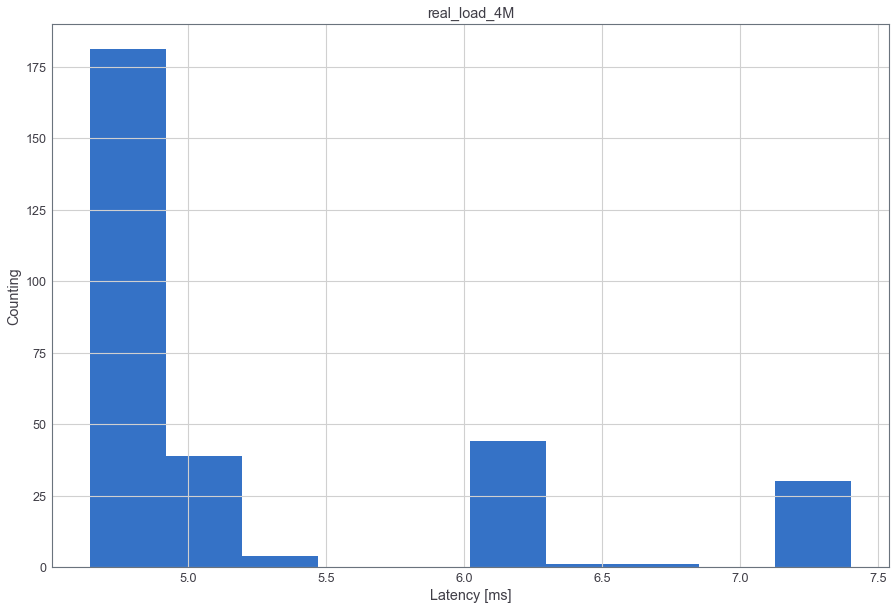

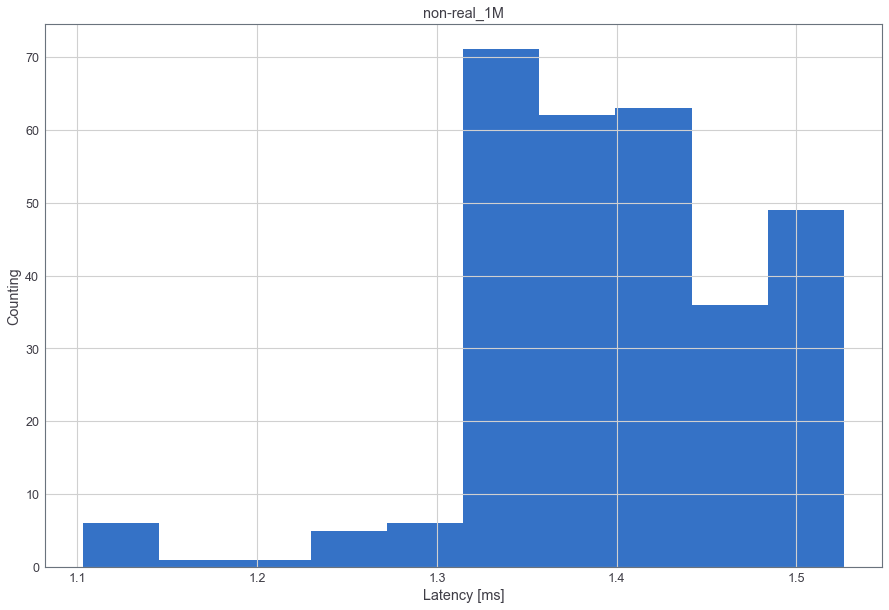

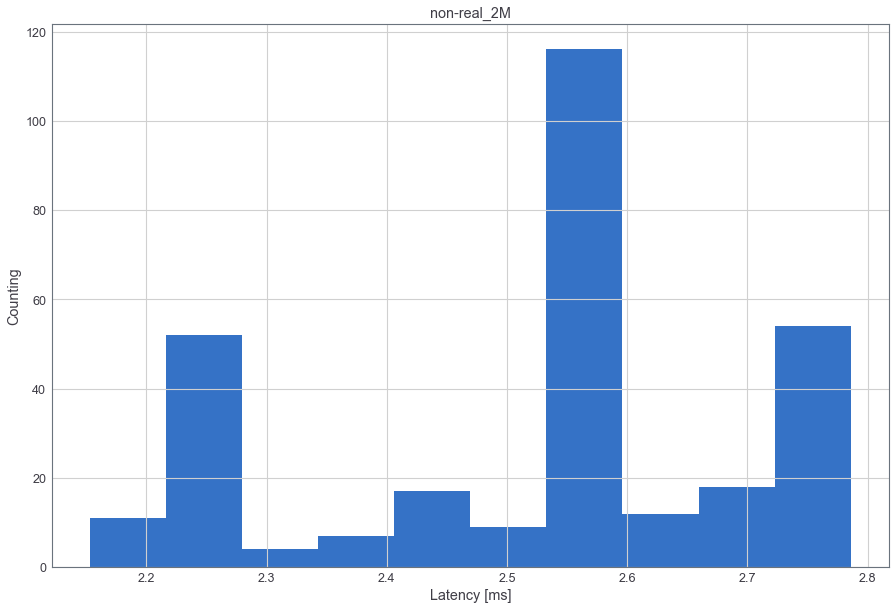

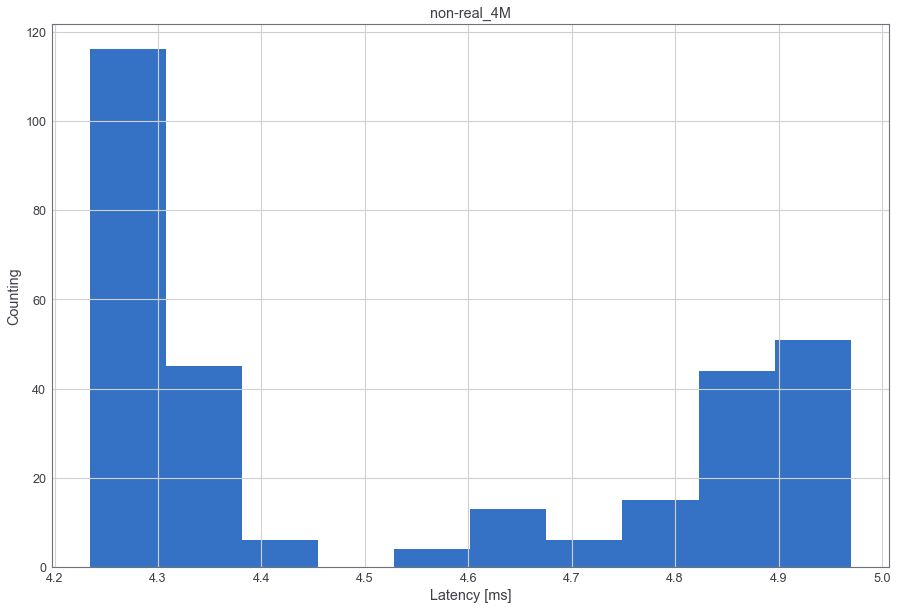

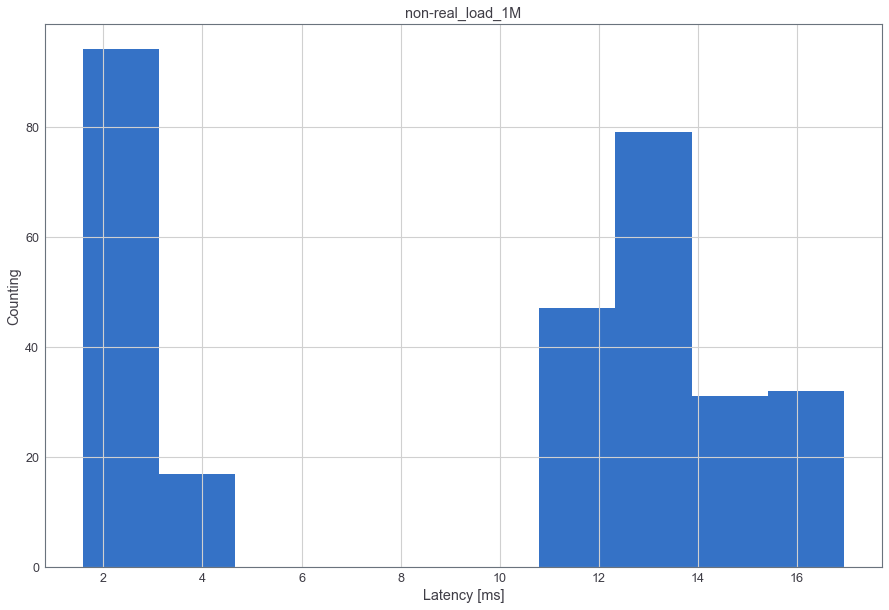

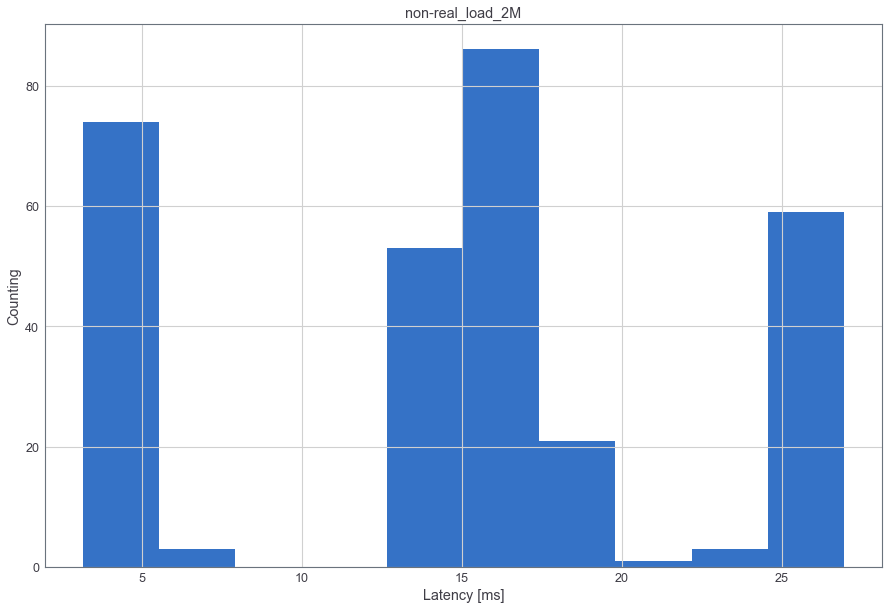

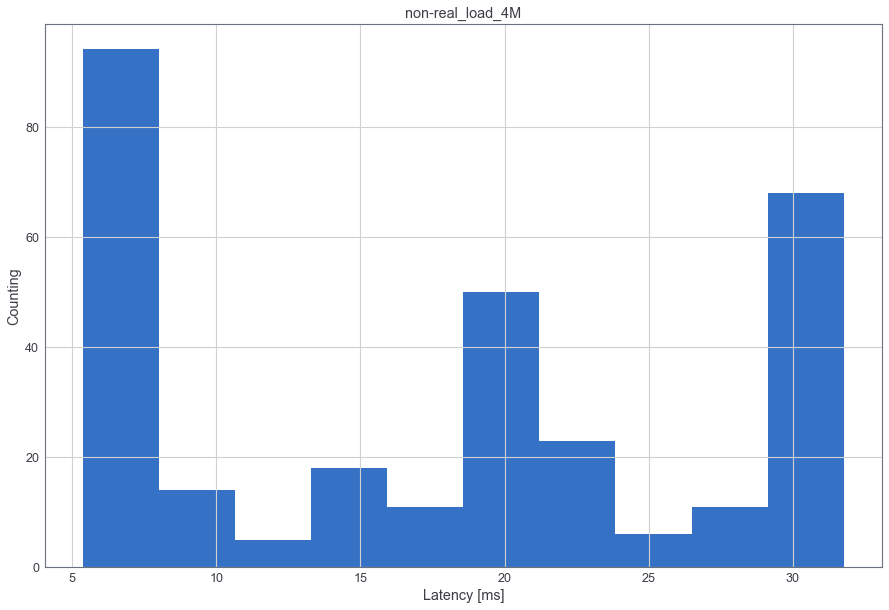

In [13]:
for i in label:
    temp = pd.DataFrame(df[i]).apply(cap, quantile=[0.01,0.9])
    boxfig = temp.hist(bins=10, figsize=(15,10))
    for axis in boxfig.flatten():
        axis.set_xlabel("Latency [ms]")
        axis.set_ylabel("Counting")
    plt.savefig("./q3/figure/hist/"+i+".png")